In [1]:
import pandas as pd 
import numpy as np
from datetime import datetime #datetime for timeseries support
import pandas_datareader as data
import matplotlib.pyplot as plt
from matplotlib.pyplot import hist
from bs4 import BeautifulSoup
import bs4
import requests
import json

## Get the article links from Walla's main page

In [2]:
def get_article_links(url_page_home):
    html_response = requests.get(url_page_home)
    soup = BeautifulSoup(html_response.content, 'html.parser')

    urls_list = []
    articles = soup('section' ,class_='walla-core-container css-1ss8osd walla-top-container')
    #print(type(articles))
    articles = articles[0]
    
    links = articles.find_all('a') # find all the links
    for link in links:
        art_url = link.get('href') # get the url
        #print(art_url)

        # Here we take only the articles in to our url_list
        if "item" in art_url and "viva" not in art_url and '3363290' not in art_url:
            urls_list.append(art_url)

    urls_list = [url[:url.find('?')] if '?' in url else url
                 for url in urls_list] # make sure the url is clean
    articles_id = [url[-7:] for url in urls_list] # take the url_id

    return urls_list, articles_id

In [3]:
# Save all the article Url's and all the Articles id
walla = get_article_links('https://www.walla.co.il/')
urls = walla[0]
articles_id = walla[1]

In [5]:
for url in urls:
    print(url) # check ourselves
print(articles_id, len(articles_id))

https://news.walla.co.il/item/3379021
https://news.walla.co.il/item/2773368
https://news.walla.co.il/item/3379574
https://healthy.walla.co.il/item/3379266
https://travel.walla.co.il/item/3379569
https://food.walla.co.il/item/3378116
https://career.walla.co.il/item/3373421
https://tld.walla.co.il/item/3050864
https://tld.walla.co.il/item/3373407
https://sports.walla.co.il/item/3379582
https://food.walla.co.il/item/3379315
https://tech.walla.co.il/item/3379508
https://gemara.walla.co.il/item/3378949
https://tld.walla.co.il/item/3379246
https://www.sheee.co.il/item/3378595
https://news.walla.co.il/item/3379566
https://news.walla.co.il/item/3379429
https://news.walla.co.il/item/3379478
https://news.walla.co.il/item/3378135
https://news.walla.co.il/item/3379504
https://news.walla.co.il/item/3379559
https://news.walla.co.il/item/3379547
https://news.walla.co.il/item/3379501
https://tld.walla.co.il/item/3222767
https://tld.walla.co.il/item/3377916
https://tld.walla.co.il/item/3355515
https://

## Get all the tags from all the articles in the main page

In [6]:
# Creat a list that would save the times of the crawler entering to articles
crawler_dt = []

In [7]:
# Creating the function that get the tags
def get_article_tags(url):
    html_response = requests.get(url)
    soup = BeautifulSoup(html_response.content, 'html.parser')
    # saving the crawler times
    now = datetime.now()
    dt_string = now.strftime("%d/%m/%Y %H:%M:%S")
    crawler_dt.append(dt_string)

    tags_class_list = ['css-1234ruv tags-list no-mobile-app', 'tags target-editorial', 'css-1234ruv sheee tags-list no-mobile-app','css-1234ruv  tags-list no-mobile-app'] # all the classes tags are in
    tags = []

    for tag_class in tags_class_list:
        if soup('section', class_ = tag_class) == []:
            #print("Doesn't exist")
            continue

        classes = soup('section', class_ = tag_class)
        #print(classes)
        classes = classes[0]
        links = classes('a')
        #print(links)
        for link in links:
            tags.append(link.text)
        break

    if len(tags) == 0:
        return 'null'

    return tags

In [8]:
# Using the function to get all the tags from all the article in a list
tags = []
for url in urls:
    tags.append(get_article_tags(url))

In [9]:
#print all the tags and their number
print(len(tags))
for tag in tags:
    print(tag)

116
['טיסות', 'משרד התחבורה', 'משרד הבריאות', 'נגיף הקורונה', 'נתב"ג']
['מייל אדום']
['ולדימיר פוטין', 'רוסיה', 'נגיף הקורונה']
['קורונה', 'קוביד-19', 'אליסה מילאנו']
['עמק המעיינות', 'ניר דוד']
['בשר']
['שיווק עצמי']
['פטרת הציפורניים', 'טיפול', 'רגליים']
['גברא']
['הוקי קרח']
['גרקו', 'מתכון', 'בורקיטס', 'בורקס']
['הונאה']
['כסף', 'צדקה', 'הרב חיים דוד קובלסקי', 'הגמרא הדיגיטלית', 'מוות']
['מסכות']
['הישרדות']
['נגיף הקורונה', 'משרד הבריאות']
['שיקגו', 'ארצות הברית']
['ארצות הברית', 'דונלד טראמפ', 'הר ראשמור']
['איראן', 'דובאי']
['חמאס', 'צה"ל', 'בלוני תבערה']
['פדופיליה', 'בית הדין הארצי לעבודה']
['תחבורה', 'ארקיע', 'נתב"ג']
['בלארוס', 'מחאות', 'אלכסנדר לוקשנקו']
['שינה', 'נחירות']
['תואר בתקשורת', 'המכללה למנהל', 'תקשורת']
['מסכה', 'קורונה']
['כרטיס ביקור דיגיטלי']
['פורנו', 'מכירה פומבית', 'לבנון', 'ביירות', 'מיה חליפה']
['מוס שוקולד']
['שינה', 'נחירות']
['משחקים', 'סטריט פייטר', 'טקן']
["גארת' בייל", 'ריאל מדריד']
['ליגת העל']
['דור מיכה', 'מכבי תל אביב בכדורגל']
['הפועל רעננה', 

In [10]:
#print all the crawler times and their number
print(crawler_dt)
print(len(crawler_dt))

['11/08/2020 13:37:17', '11/08/2020 13:37:18', '11/08/2020 13:37:18', '11/08/2020 13:37:19', '11/08/2020 13:37:19', '11/08/2020 13:37:19', '11/08/2020 13:37:21', '11/08/2020 13:37:22', '11/08/2020 13:37:23', '11/08/2020 13:37:23', '11/08/2020 13:37:23', '11/08/2020 13:37:23', '11/08/2020 13:37:24', '11/08/2020 13:37:25', '11/08/2020 13:37:25', '11/08/2020 13:37:25', '11/08/2020 13:37:26', '11/08/2020 13:37:26', '11/08/2020 13:37:26', '11/08/2020 13:37:26', '11/08/2020 13:37:26', '11/08/2020 13:37:26', '11/08/2020 13:37:27', '11/08/2020 13:37:27', '11/08/2020 13:37:27', '11/08/2020 13:37:29', '11/08/2020 13:37:29', '11/08/2020 13:37:30', '11/08/2020 13:37:30', '11/08/2020 13:37:30', '11/08/2020 13:37:30', '11/08/2020 13:37:30', '11/08/2020 13:37:30', '11/08/2020 13:37:31', '11/08/2020 13:37:31', '11/08/2020 13:37:31', '11/08/2020 13:37:31', '11/08/2020 13:37:31', '11/08/2020 13:37:32', '11/08/2020 13:37:32', '11/08/2020 13:37:32', '11/08/2020 13:37:34', '11/08/2020 13:37:34', '11/08/202

## Get all the article talkbacks via Walla's API

In [ ]:
# Creating the function that takes the comments content, likes, and dislikes
def get_article_talkbacks(url, article_id):
    url_page = 1
    url_type = 1
    url_final = url.format(article_id)

    comments = []
    while True:
        # give the api the paramaeters for finding the comments
        html_response = requests.get(url_final, params={'page': url_page, 'type': url_type})
        if html_response.status_code != 200:
            break
        
        # moving to the next comments page
        url_page += 1

        content = json.loads(html_response.content, encoding='utf-8')
        data = content['data']
        # check if we are at the last page of the comments or the article doesn't have any comments
        if not data:
            break
        
        # Get the content/ likes/ dislikes from the comment
        data = data['list']
        for entry in data:
            comment = [article_id, entry['content'], entry['positive'], entry['negative']]
            comments.append(comment)

    return comments
# check a single article
get_article_talkbacks('https://dal.walla.co.il/talkback/list/{}', 3379189)

In [ ]:
# Create the Talkbacks table
talkbacks = pd.DataFrame(columns=['id','comment_text','likes','dislikes'])
talkbacks

In [ ]:
# Fill the talkbacks table with the talkbacks form every article url we found
articles_without_talkbacks = []
for article_id in articles_id:
    comments = get_article_talkbacks('https://dal.walla.co.il/talkback/list/{}', article_id)
    if not comments:
        articles_without_talkbacks.append(article_id)
        continue

    for comment in comments: #add to the table
        talkbacks = talkbacks.append(pd.Series(comment,index=talkbacks.columns), ignore_index=True)

In [ ]:
print(talkbacks.groupby('id').count().reset_index()) 
print(len(articles_without_talkbacks))
print(len(articles_id))

In [ ]:
unq = talkbacks.groupby('id').count().reset_index()
print(unq)
unq = unq['id'].unique().tolist()
#print(len(unq),unq)

In [ ]:
no_comments_articles = [art_id for art_id in articles_id if art_id not in unq]
len(no_comments_articles)

## Get all the articles headlines for article table

In [ ]:
def get_article_headline(url):
    html_response = requests.get(url)
    soup = BeautifulSoup(html_response.content, 'html.parser')
    header_tag = soup.find('h1').get_text()
    return header_tag 

headlines = []
for url in urls:
    headlines.append(get_article_headline(url))
for head in headlines:
    print(head)

In [ ]:
# print the headlines
print(len(headlines))
for head in headlines:
    print(head)

## Get all the articles publish dates

In [ ]:
def get_publish_dt(url):
    response = requests.get(url)
    soup = BeautifulSoup(response.content,'html.parser')

    time = soup.find('time')
    if time:
        #print(time)
        dt = time["datetime"]
        #print(dt)
        return dt

    time = soup.find('span', class_= 'pubdate')
    if isinstance(time, bs4.element.Tag):
        return time.text

    return 'null'

pub_time_list = []
for url in urls:
    try:
        print(url)
        artic = get_publish_dt(url)
        pub_time_list.append(artic)
    except:
        import traceback
        traceback.print_exc()

In [ ]:
# print the publish dates
for dt in pub_time_list:
    print(dt) 

## Create the articles dataframe

In [ ]:
articles = pd.DataFrame(columns=['id','publish_date','datetime_entered','headline','tags'])
articles

In [ ]:
# Reverse the hebrew -> RUN THIS ONLY ONCE
reversed_tags = []
for tag_s in tags:
    for tag in range(len(tag_s)):
        tag_s[tag] = tag_s[tag][::-1] ##reverse of the hebrew text for the diagram
    reversed_tags.append(tag_s)
reversed_tags

In [ ]:
# check if all lists are the same length
print(len(articles_id),'\n',len(pub_time_list),'\n',len(crawler_dt),'\n',len(headlines),'\n',len(reversed_tags) )

In [25]:
# enter the lists into the right columns in the df
articles['id'] = articles_id
articles['publish_date'] = pub_time_list
articles['datetime_entered'] = crawler_dt
articles['headline'] = headlines
articles['tags']= reversed_tags

In [26]:
articles

,id,publish_date,datetime_entered,headline,tags
0,3379270,2020-08-10 09:50,10/08/2020 11:01:45,"גלנט: שנת הלימודים תיפתח במועד, למרות הקשיים","[מערכת החינוך, יואב גלנט]"
1,2773368,2014-08-07 10:37,10/08/2020 11:01:45,דווחו לנו: במייל האדום וגם בווטסאפ,[מייל אדום]
2,3379282,2020-08-10 10:23,10/08/2020 11:01:45,אחרי הביקורת על היעדר נשים: השרה מירב כהן תצור...,"[מירב כהן, יעקב ליצמן]"
3,3379272,2020-08-10 10:04,10/08/2020 11:01:46,אחרי 40 ימי בידוד: ליאור כלפון צפוי להשתחרר הי...,"[ליאור כלפון, קורונה]"
4,3379226,2020-08-10 00:01,10/08/2020 11:01:46,שלומית מלכה קוטפת קמפיין אופנה בינלאומי,[שלומית מלכה]
...,...,...,...,...,...
111,3373773,19/07/2020,10/08/2020 11:02:31,הכירו את הסטארט-אפים החדשניים שיצילו את העולם,[האיחוד האירופי]
112,3373417,2020-08-03 08:34,10/08/2020 11:02:31,"ט""ו באב הגיע: יש לנו תירוץ מעולה למתנה המושלמת",[טו באב]
113,3372184,2020-07-26 13:40,10/08/2020 11:02:31,יורדים לאילת? גם וואלה!שופס: הכירו את חוויית ה...,[וואלה! שופס]
114,3371690,2020-07-19 13:33,10/08/2020 11:02:31,זה הכרחי: עכשיו גם אתם יכולים למכור באינטרנט כ...,[אתר אינטרנט]


In [27]:
# Question 5
# create to side tables where we aggregate the data in different ways, 1- sum 2- count
# then take all the articles without comments and add to the aggregated table

num_of_likes_dislikes = talkbacks[['id','likes','dislikes']].groupby('id').sum()
comments_count = talkbacks[['id','comment_text']].groupby('id').count()

#print(num_of_likes_dislikes,'\n',comments_count)

merged_table = pd.merge(comments_count, num_of_likes_dislikes, on=['id'], how='outer').reset_index()
print('\n',merged_table)

no_comments_df = pd.DataFrame(columns=['id','comment_text','likes','dislikes'])
no_comments_df['id'] = articles_without_talkbacks
no_comments_df = no_comments_df.fillna("0")
print('\n',no_comments_df)

new_merge = pd.concat([merged_table,no_comments_df]).reset_index()
print('\n',new_merge)


          id  comment_text  likes  dislikes
0   2773368             2      0         0
1   2976403            23     37        26
2   3222767             5     13         6
3   3253990             5     20        20
4   3345207            20     37        20
..      ...           ...    ...       ...
82  3379260            33    111        35
83  3379265             2      2         0
84  3379270            26     55        27
85  3379272            10     34         8
86  3379282             9     10         3

[87 rows x 4 columns]

          id comment_text likes dislikes
0   3376067            0     0        0
1   3224424            0     0        0
2   3369082            0     0        0
3   3050864            0     0        0
4   3077181            0     0        0
5   3376338            0     0        0
6   3379281            0     0        0
7   3376067            0     0        0
8   3376090            0     0        0
9   3376162            0     0        0
10  3376003      

In [11]:
# Question 6
# Find and sort the most frequent tags
import operator
def Top_tags(tags):
    counts = {}
    # new_tags = []
    for tag in tags:
        if type(tag) == list:
            for c in range(len(tag)):
                tag[c] = tag[c][::-1] ##reverse of the hebrew text for the diagram
                counts[tag[c]] = counts.get(tag[c], 0) + 1
    return counts

top_tags = Top_tags(tags)

sorted_tags = sorted(top_tags.items(), key=operator.itemgetter(1))
sorted_tags = sorted(sorted_tags, key=lambda t: t[1], reverse=True)[:10] ##takes the first 10 places of th
print(sorted_tags)

[('הנורוק', 10), ('הנורוקה ףיגנ', 6), ('ןוכתמ', 4), ('רשב', 3), ('תילטיגידה ארמגה', 3), ('תודרשיה', 3), ('ץיק', 3), ('תואירבה דרשמ', 2), ('ג"בתנ', 2), ('91-דיבוק', 2)]


[('הנורוק', 10), ('הנורוקה ףיגנ', 6), ('ןוכתמ', 4), ('רשב', 3), ('תילטיגידה ארמגה', 3), ('תודרשיה', 3), ('ץיק', 3), ('תואירבה דרשמ', 2), ('ג"בתנ', 2), ('91-דיבוק', 2)]


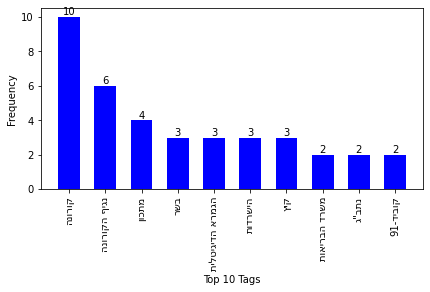

In [12]:
# Question 6
# Printing the 
print(sorted_tags)

word, frequency = zip(*sorted_tags )
indices = np.arange(len(sorted_tags ))
plt.xticks(indices, word, rotation='vertical')
plt.tight_layout()
plt.xlabel('Top 10 Tags')
plt.ylabel('Frequency')

bars = plt.bar(word, height=frequency, width=.6, color='B')
for rect in bars:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%d' % int(height), ha='center', va='bottom')
plt.show()

### talkbacks DataFrame

In [30]:
# Question 7
# find the quantity of talkbacks in each article and sort it by decsending order - then take the first 10.
most_talkbacked = talkbacks[['id','comment_text']].groupby(['id']).count().reset_index()
most_talkbacked = most_talkbacked.sort_values(['comment_text'], ascending=False)
most_talkbacked = most_talkbacked[:10]
most_talkbacked

,id,comment_text
77,3379227,716
78,3379230,397
30,3377615,371
52,3378896,197
76,3379226,90
72,3379192,77
34,3377918,75
79,3379240,71
54,3378920,65
53,3378901,65


In [31]:
# Question 7
# merge the above table with the one with their headlines
most_talkbacked_headlines = pd.merge(most_talkbacked, articles[['id','headline']], on=['id'], how='inner')
most_talkbacked_headlines

,id,comment_text,headline
0,3379227,716,"מתי כספי קרא לנתניהו ""דיקטטור"" בסרטון והסיר או..."
1,3379227,716,"מתי כספי קרא לנתניהו ""דיקטטור"" בסרטון והסיר או..."
2,3379230,397,"נתניהו השאיר פתח לתקווה, אך ספק אם הוא רוצה למ..."
3,3377615,371,"רב טוען שהקוד הסודי של התנ""ך מאשר: ""אנחנו בימי..."
4,3378896,197,איפה כל החברות שלך? הבנו מה הבעיה של אלה עם נשים
5,3379226,90,שלומית מלכה קוטפת קמפיין אופנה בינלאומי
6,3379226,90,שלומית מלכה קוטפת קמפיין אופנה בינלאומי
7,3379192,77,"עברי לידר: ""ההישג הגדול - פתיחת ההופעות"", אסי ..."
8,3377918,75,בנייה בשלט רחוק: בית פרטי למשפחה בשרון
9,3379240,71,"חוגג ממשיך להתלבט: ""אם אצרף את אצילי, ינסו להר..."


[('3379227', 716), ('3379230', 397), ('3377615', 371), ('3378896', 197), ('3379226', 90), ('3379192', 77), ('3377918', 75), ('3379240', 71), ('3378920', 65), ('3378901', 65)]


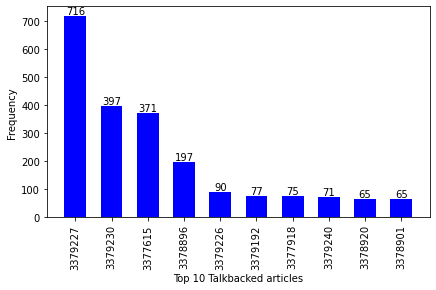

In [32]:
# Question 8
# Create the histogram for the ten first most talkbacked articles
subset = most_talkbacked[['id', 'comment_text']]
tuples = [tuple(x) for x in subset.to_numpy()]
print(tuples)

word, frequency = zip(*tuples )
indices = np.arange(len(tuples))
plt.xticks(indices, word, rotation='vertical')
plt.tight_layout()
plt.xlabel('Top 10 Talkbacked articles')
plt.ylabel('Frequency')

bars = plt.bar(word, height=frequency, width=.6, color='B')
for rect in bars:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%d' % int(height), ha='center', va='bottom')
plt.show()

In [33]:
# Question 9 - Exporting to a csv file
articles.to_csv('/Users/xtality/Desktop/articles.csv',encoding="utf-8-sig", index = False)
talkbacks.to_csv('/Users/xtality/Desktop/talkbacks.csv',encoding="utf-8-sig", index = False)